In [1]:
from google.colab import drive
from sklearn import metrics
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [29]:
from mpl_toolkits.mplot3d import Axes3D

In [2]:
print(os.listdir("/content/gdrive/MyDrive"))

['Getting started.pdf', 'WP_20170419_100.jpg', 'WP_20170419_098.jpg', 'WP_20170419_099.jpg', 'WP_20170419_101.jpg', 'WP_20170419_103.jpg', 'WP_20170419_102.jpg', 'WP_20170419_104.jpg', 'WP_20170419_107.jpg', 'WP_20170419_106.jpg', 'WP_20170419_109.jpg', 'WP_20170419_113.jpg', 'WP_20170419_110.jpg', 'WP_20170419_114.jpg', 'WP_20170419_117.jpg', 'WP_20170419_115.jpg', 'WP_20170419_118.jpg', 'WP_20170419_121.jpg', 'WP_20170419_127.jpg', 'WP_20170419_128.jpg', 'WP_20170419_131.jpg', 'facerecognition.py', 'AI Introduction.pptx', 'aup6.py', 'aup1.py', 'aup2.py', 'aup3.py', 'amazoncode.py', 'annregression.py', 'Artificial Intelligence.pptx', 'characterrecognition using svm.py', 'digitrecognition using MLP.py', 'edgedetection.py', 'facedetection.py', 'facedetectionbest.py', 'finalselfdrivingcar.py', 'haarcascade_eye.xml', 'haarcascade_frontalface_alt2.xml', 'imageprocessing.py', 'linearregressionmodel.py', 'linearregressiontoday.py', 'linearregressionusingsklearn.py', 'Machine learninig.pptx',

In [5]:
train = pd.read_csv('/content/gdrive/MyDrive/train3.csv')
test = pd.read_csv('/content/gdrive/MyDrive/test3.csv')

# **Data Summarization and Visualization**

In [6]:
print("train data shape: ",train.shape)
print("Test data shape: ",test.shape)

train data shape:  (150150, 9)
Test data shape:  (13860, 8)


In [18]:
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


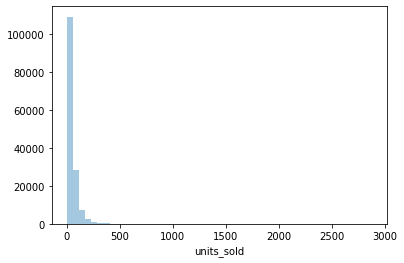

In [9]:
sns.distplot(train['units_sold'],kde = False)
plt.show()

In [10]:
all_data = train.append(test,sort = False)
all_data.shape

(164010, 9)

Text(0, 0.5, 'units_sold')

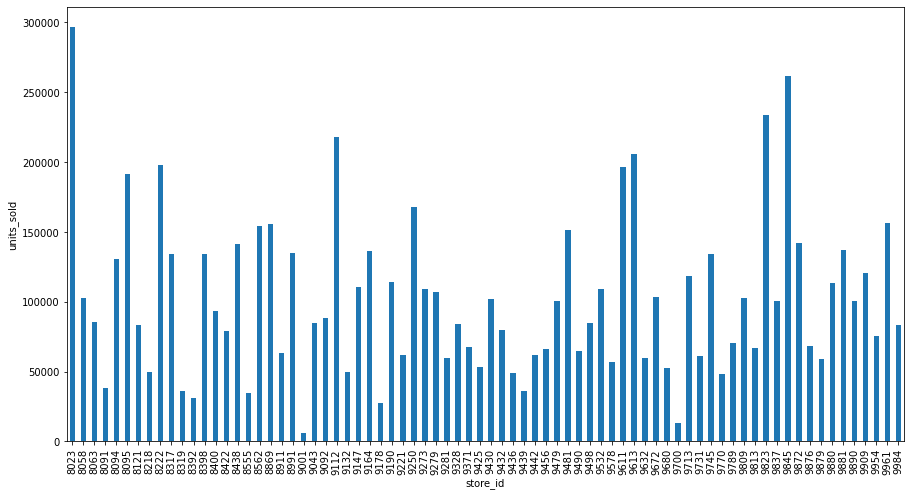

In [20]:
train.groupby('store_id').sum()['units_sold'].plot(figsize=(15,8),kind='bar')
plt.xlabel('store_id')
plt.ylabel('units_sold')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


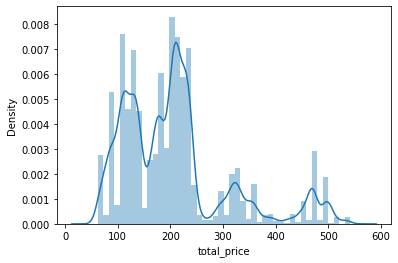

In [21]:
import seaborn as sns
sns.distplot(train['total_price'])

# **Handling Missing Values**

In [8]:
train.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [22]:
train[train['total_price'].isna() == True]

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
136949,193915,23/04/13,9436,245338,NaN,469.5375,0,0,1


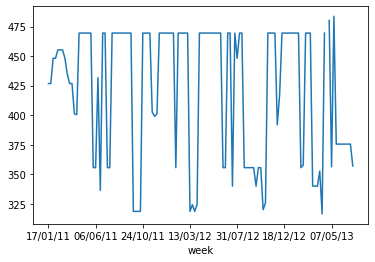

In [25]:
train[(train['store_id']==9436) & (train['sku_id']==245338) ].set_index('week')['total_price'].plot()

In [26]:
train = train.fillna(475)

In [27]:
train.isna().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

# **Data Preprocessing**

In [11]:
all_data.tail()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
13855,232281,01/10/13,9984,223245,241.5375,241.5375,0,0,NaN
13856,232282,01/10/13,9984,223153,240.8250,240.8250,0,0,NaN
13857,232285,01/10/13,9984,245338,382.6125,401.8500,1,1,NaN
13858,232286,01/10/13,9984,547934,191.6625,191.6625,0,0,NaN
13859,232287,01/10/13,9984,679023,234.4125,234.4125,0,0,NaN


In [13]:
all_data['week'] = pd.to_datetime(all_data['week'])
all_data.dtypes

record_ID                   int64
week               datetime64[ns]
store_id                    int64
sku_id                      int64
total_price               float64
base_price                float64
is_featured_sku             int64
is_display_sku              int64
units_sold                float64
dtype: object

In [16]:
all_data.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,year,month,day
0,1,3,8091,216418,99.0375,111.8625,0,0,20.0,2011,1,17
1,2,3,8091,216419,99.0375,99.0375,0,0,28.0,2011,1,17
2,3,3,8091,216425,133.9500,133.9500,0,0,19.0,2011,1,17
3,4,3,8091,216233,133.9500,133.9500,0,0,44.0,2011,1,17
4,5,3,8091,217390,141.0750,141.0750,0,0,52.0,2011,1,17


In [34]:
train.isna().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [35]:
df = train.append(test)

In [36]:
df.shape

(164010, 9)

In [42]:
column=['sku_id','store_id']
name='count_id_sku_store'
temp=df.groupby(column)['record_ID'].count().reset_index().rename(columns={'record_ID':name})
temp
df = pd.merge(df,temp,how = 'left',on = column)
df[name] = df[name].astype(float)
df[name].fillna(np.median(temp[name]),inplace=True)

KeyError: ignored

In [39]:
column = ['sku_id']
name='count_id_sku'
temp=df.groupby(column)['record_ID'].count().reset_index().rename(columns={'record_ID':name})
temp
df = pd.merge(df,temp,how = 'left',on = column)
df[name] = df[name].astype(float)
df[name].fillna(np.median(temp[name]),inplace=True)

In [41]:
column = ['store_id']
name='count_id_store'
temp=df.groupby(column)['record_ID'].count().reset_index().rename(columns={'record_ID':name})
temp
df = pd.merge(df,temp,how = 'left',on = column)
df[name] = df[name].astype(float)
df[name].fillna(np.median(temp[name]),inplace=True)

KeyError: ignored

In [43]:
df['price_diff_percent'] = (df['base_price'] - df['total_price']) / df['base_price']

In [44]:
df['Month'] = pd.to_datetime(df['week']).dt.month

df['Day'] = pd.to_datetime(df['week']).dt.day

df['Dayofweek'] = pd.to_datetime(df['week']).dt.dayofweek

df['DayOfyear'] = pd.to_datetime(df['week']).dt.dayofyear

df['Week'] = pd.to_datetime(df['week']).dt.week

df['Quarter'] = pd.to_datetime(df['week']).dt.quarter 

df['Is_month_start'] = pd.to_datetime(df['week']).dt.is_month_start

df['Is_month_end'] = pd.to_datetime(df['week']).dt.is_month_end

df['Is_quarter_start'] = pd.to_datetime(df['week']).dt.is_quarter_start

df['Is_quarter_end'] = pd.to_datetime(df['week']).dt.is_quarter_end

df['Is_year_start'] = pd.to_datetime(df['week']).dt.is_year_start

df['Is_year_end'] = pd.to_datetime(df['week']).dt.is_year_end

df['Is_weekday'] = np.where(df['week'].isin([0,1,2,3,4]),1,0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


In [45]:
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,count_id_sku_store_x,count_id_sku,count_id_store_x,count_id_store_y,count_id_sku_store_y,price_diff_percent,Month,Day,Dayofweek,DayOfyear,Week,Quarter,Is_month_start,Is_month_end,Is_quarter_start,Is_quarter_end,Is_year_start,Is_year_end,Is_weekday
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20.0,142.0,9656.0,1278.0,1278,142,0.114650,1,17,0,17,3,1,False,False,False,False,False,False,0
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28.0,142.0,9514.0,1278.0,1278,142,0.000000,1,17,0,17,3,1,False,False,False,False,False,False,0
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19.0,142.0,9372.0,1278.0,1278,142,0.000000,1,17,0,17,3,1,False,False,False,False,False,False,0
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44.0,142.0,10508.0,1278.0,1278,142,0.000000,1,17,0,17,3,1,False,False,False,False,False,False,0
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52.0,142.0,9940.0,1278.0,1278,142,0.000000,1,17,0,17,3,1,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164005,232281,01/10/13,9984,223245,241.5375,241.5375,0,0,NaN,142.0,10366.0,2414.0,2414,142,0.000000,1,10,3,10,2,1,False,False,False,False,False,False,0
164006,232282,01/10/13,9984,223153,240.8250,240.8250,0,0,NaN,142.0,8236.0,2414.0,2414,142,0.000000,1,10,3,10,2,1,False,False,False,False,False,False,0
164007,232285,01/10/13,9984,245338,382.6125,401.8500,1,1,NaN,142.0,9088.0,2414.0,2414,142,0.047872,1,10,3,10,2,1,False,False,False,False,False,False,0
164008,232286,01/10/13,9984,547934,191.6625,191.6625,0,0,NaN,142.0,4402.0,2414.0,2414,142,0.000000,1,10,3,10,2,1,False,False,False,False,False,False,0


In [46]:

from sklearn.preprocessing import LabelEncoder

In [47]:
df.dtypes

record_ID                 int64
week                     object
store_id                  int64
sku_id                    int64
total_price             float64
base_price              float64
is_featured_sku           int64
is_display_sku            int64
units_sold              float64
count_id_sku_store_x    float64
count_id_sku            float64
count_id_store_x        float64
count_id_store_y          int64
count_id_sku_store_y      int64
price_diff_percent      float64
Month                     int64
Day                       int64
Dayofweek                 int64
DayOfyear                 int64
Week                      int64
Quarter                   int64
Is_month_start             bool
Is_month_end               bool
Is_quarter_start           bool
Is_quarter_end             bool
Is_year_start              bool
Is_year_end                bool
Is_weekday                int64
dtype: object

In [48]:
df.select_dtypes(exclude=["int","float"]).columns

Index(['week', 'Is_month_start', 'Is_month_end', 'Is_quarter_start',
       'Is_quarter_end', 'Is_year_start', 'Is_year_end'],
      dtype='object')

In [49]:
col=['store_id','sku_id','Is_month_start','Is_month_end','Is_quarter_start','Is_quarter_end','Is_year_start','Is_year_end']

In [50]:
for i in col:
    df = pd.get_dummies(df, columns=[i])

In [51]:
df

,record_ID,week,total_price,base_price,is_featured_sku,is_display_sku,units_sold,count_id_sku_store_x,count_id_sku,count_id_store_x,count_id_store_y,count_id_sku_store_y,price_diff_percent,Month,Day,Dayofweek,DayOfyear,Week,Quarter,Is_weekday,store_id_8023,store_id_8058,store_id_8063,store_id_8091,store_id_8094,store_id_8095,store_id_8121,store_id_8218,store_id_8222,store_id_8317,store_id_8319,store_id_8392,store_id_8398,store_id_8400,store_id_8422,store_id_8438,store_id_8555,store_id_8562,store_id_8869,store_id_8911,...,store_id_9961,store_id_9984,sku_id_216233,sku_id_216418,sku_id_216419,sku_id_216425,sku_id_217217,sku_id_217390,sku_id_217777,sku_id_219009,sku_id_219029,sku_id_219844,sku_id_222087,sku_id_222765,sku_id_223153,sku_id_223245,sku_id_245338,sku_id_245387,sku_id_300021,sku_id_300291,sku_id_320485,sku_id_327492,sku_id_378934,sku_id_398721,sku_id_545621,sku_id_546789,sku_id_547934,sku_id_600934,sku_id_673209,sku_id_679023,Is_month_start_False,Is_month_start_True,Is_month_end_False,Is_month_end_True,Is_quarter_start_False,Is_quarter_start_True,Is_quarter_end_False,Is_year_start_False,Is_year_start_True,Is_year_end_False
0,1,17/01/11,99.0375,111.8625,0,0,20.0,142.0,9656.0,1278.0,1278,142,0.114650,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
1,2,17/01/11,99.0375,99.0375,0,0,28.0,142.0,9514.0,1278.0,1278,142,0.000000,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
2,3,17/01/11,133.9500,133.9500,0,0,19.0,142.0,9372.0,1278.0,1278,142,0.000000,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
3,4,17/01/11,133.9500,133.9500,0,0,44.0,142.0,10508.0,1278.0,1278,142,0.000000,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
4,5,17/01/11,141.0750,141.0750,0,0,52.0,142.0,9940.0,1278.0,1278,142,0.000000,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164005,232281,01/10/13,241.5375,241.5375,0,0,NaN,142.0,10366.0,2414.0,2414,142,0.000000,1,10,3,10,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
164006,232282,01/10/13,240.8250,240.8250,0,0,NaN,142.0,8236.0,2414.0,2414,142,0.000000,1,10,3,10,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
164007,232285,01/10/13,382.6125,401.8500,1,1,NaN,142.0,9088.0,2414.0,2414,142,0.047872,1,10,3,10,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
164008,232286,01/10/13,191.6625,191.6625,0,0,NaN,142.0,4402.0,2414.0,2414,142,0.000000,1,10,3,10,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1


In [52]:
df.drop(['record_ID','week'],inplace=True,axis=1)

In [53]:
df.head()

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,count_id_sku_store_x,count_id_sku,count_id_store_x,count_id_store_y,count_id_sku_store_y,price_diff_percent,Month,Day,Dayofweek,DayOfyear,Week,Quarter,Is_weekday,store_id_8023,store_id_8058,store_id_8063,store_id_8091,store_id_8094,store_id_8095,store_id_8121,store_id_8218,store_id_8222,store_id_8317,store_id_8319,store_id_8392,store_id_8398,store_id_8400,store_id_8422,store_id_8438,store_id_8555,store_id_8562,store_id_8869,store_id_8911,store_id_8991,store_id_9001,...,store_id_9961,store_id_9984,sku_id_216233,sku_id_216418,sku_id_216419,sku_id_216425,sku_id_217217,sku_id_217390,sku_id_217777,sku_id_219009,sku_id_219029,sku_id_219844,sku_id_222087,sku_id_222765,sku_id_223153,sku_id_223245,sku_id_245338,sku_id_245387,sku_id_300021,sku_id_300291,sku_id_320485,sku_id_327492,sku_id_378934,sku_id_398721,sku_id_545621,sku_id_546789,sku_id_547934,sku_id_600934,sku_id_673209,sku_id_679023,Is_month_start_False,Is_month_start_True,Is_month_end_False,Is_month_end_True,Is_quarter_start_False,Is_quarter_start_True,Is_quarter_end_False,Is_year_start_False,Is_year_start_True,Is_year_end_False
0,99.0375,111.8625,0,0,20.0,142.0,9656.0,1278.0,1278,142,0.11465,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
1,99.0375,99.0375,0,0,28.0,142.0,9514.0,1278.0,1278,142,0.00000,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
2,133.9500,133.9500,0,0,19.0,142.0,9372.0,1278.0,1278,142,0.00000,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
3,133.9500,133.9500,0,0,44.0,142.0,10508.0,1278.0,1278,142,0.00000,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
4,141.0750,141.0750,0,0,52.0,142.0,9940.0,1278.0,1278,142,0.00000,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


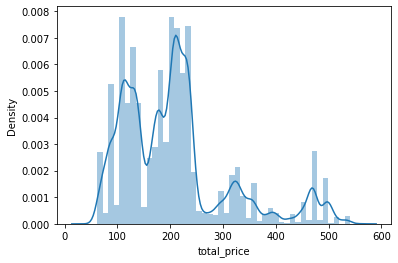

In [54]:
import seaborn as sns
sns.distplot(df['total_price'])

In [55]:
df['total_price']=np.log1p(df['total_price'])
df['base_price']=np.log1p(df['base_price'])
df['units_sold'] = np.log1p(df['units_sold'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


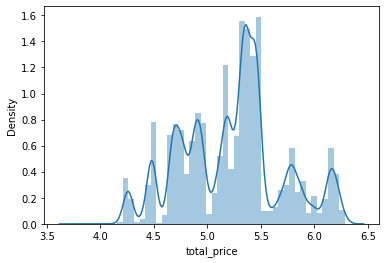

In [56]:
sns.distplot(df['total_price'])

In [57]:
tests = df[df['units_sold'].isna() == True]
trains = df[df['units_sold'].isna() == False]

In [58]:
print(trains.shape,tests.shape)

(150150, 132) (13860, 132)


In [59]:
del tests['units_sold']

In [60]:
trains.corr()

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,count_id_sku_store_x,count_id_sku,count_id_store_x,count_id_store_y,count_id_sku_store_y,price_diff_percent,Month,Day,Dayofweek,DayOfyear,Week,Quarter,Is_weekday,store_id_8023,store_id_8058,store_id_8063,store_id_8091,store_id_8094,store_id_8095,store_id_8121,store_id_8218,store_id_8222,store_id_8317,store_id_8319,store_id_8392,store_id_8398,store_id_8400,store_id_8422,store_id_8438,store_id_8555,store_id_8562,store_id_8869,store_id_8911,store_id_8991,store_id_9001,...,store_id_9961,store_id_9984,sku_id_216233,sku_id_216418,sku_id_216419,sku_id_216425,sku_id_217217,sku_id_217390,sku_id_217777,sku_id_219009,sku_id_219029,sku_id_219844,sku_id_222087,sku_id_222765,sku_id_223153,sku_id_223245,sku_id_245338,sku_id_245387,sku_id_300021,sku_id_300291,sku_id_320485,sku_id_327492,sku_id_378934,sku_id_398721,sku_id_545621,sku_id_546789,sku_id_547934,sku_id_600934,sku_id_673209,sku_id_679023,Is_month_start_False,Is_month_start_True,Is_month_end_False,Is_month_end_True,Is_quarter_start_False,Is_quarter_start_True,Is_quarter_end_False,Is_year_start_False,Is_year_start_True,Is_year_end_False
total_price,1.000000,0.964818,0.055316,-0.095097,-0.307979,NaN,-2.054021e-01,7.443723e-02,7.443723e-02,NaN,-0.086049,0.004914,-0.000544,0.010891,0.004839,0.004810,0.007791,NaN,2.686200e-02,1.722529e-02,1.026563e-02,-2.688166e-02,2.902744e-03,6.420118e-03,3.218706e-02,-1.842909e-02,4.842662e-03,1.296275e-02,1.885809e-02,3.290496e-03,1.368816e-02,3.204540e-03,3.643160e-03,2.404864e-02,-1.542993e-02,1.498783e-02,6.474291e-03,1.430413e-03,1.641154e-02,-1.983564e-02,...,1.697112e-03,-2.267000e-02,-2.171788e-01,-3.743690e-01,-3.692773e-01,-2.035300e-01,7.610962e-02,-1.108717e-01,6.395251e-02,3.277007e-02,2.639500e-01,9.182211e-02,2.226258e-02,8.931642e-02,4.881216e-02,4.694938e-02,4.314242e-01,3.503098e-01,-2.863650e-01,-1.109926e-01,3.224729e-02,-5.188575e-02,2.852574e-02,2.241681e-01,3.703848e-02,1.078567e-02,-3.868925e-02,1.445704e-01,5.233599e-02,1.258836e-02,0.001636,-0.001636,-0.011940,0.011940,0.002686,-0.002686,NaN,0.002686,-0.002686,NaN
base_price,0.964818,1.000000,0.194962,0.005290,-0.223743,NaN,-2.046420e-01,7.424288e-02,7.424288e-02,NaN,0.177274,0.001780,-0.001263,0.005652,0.001646,0.001703,0.001878,NaN,2.899273e-02,1.954051e-02,7.107968e-03,-2.715420e-02,4.344814e-03,8.359997e-03,2.847701e-02,-2.050593e-02,7.936349e-03,1.072402e-02,1.788929e-02,8.688417e-03,1.749924e-02,3.381910e-03,2.427099e-03,2.240894e-02,-1.580451e-02,1.609660e-02,1.001098e-02,-6.764410e-04,1.401747e-02,-2.144516e-02,...,2.330511e-03,-2.328172e-02,-2.319672e-01,-3.830917e-01,-3.789106e-01,-2.175455e-01,6.471937e-02,-1.115583e-01,5.300460e-02,3.372749e-02,2.566819e-01,8.503562e-02,6.505817e-02,8.298582e-02,5.695879e-02,5.000641e-02,4.514187e-01,3.668756e-01,-2.946814e-01,-8.097853e-02,1.860719e-02,-3.959143e-02,1.599767e-02,2.347954e-01,3.631706e-02,9.803197e-03,-3.960907e-02,1.465378e-01,5.140975e-02,1.215924e-02,0.004799,-0.004799,-0.002761,0.002761,0.003631,-0.003631,NaN,0.003631,-0.003631,NaN
is_featured_sku,0.055316,0.194962,1.000000,0.426243,0.280215,NaN,-1.153827e-02,1.184017e-02,1.184017e-02,NaN,0.546044,0.005281,-0.004591,-0.012028,0.004940,0.005518,-0.005490,NaN,-3.082096e-06,-4.884207e-04,2.464432e-03,-8.207756e-03,9.039988e-04,-2.876296e-03,9.192179e-03,1.163066e-03,-1.596306e-03,5.627401e-03,9.059078e-04,5.307918e-04,2.200388e-03,1.239342e-03,7.448595e-03,6.438498e-03,5.061866e-03,1.329385e-03,-1.331444e-03,7.913454e-03,6.018389e-03,-4.281103e-03,...,-2.313395e-03,-5.134509e-03,-4.973929e-02,-4.870565e-02,-4.880984e-02,-4.784526e-02,-1.254527e-02,-3.332293e-02,-1.156146e-02,-5.074378e-03,-1.278425e-02,-1.060627e-02,1.031229e-02,2.459470e-02,6.119668e-02,2.109637e-02,1.478538e-01,1.213682e-01,-4.311099e-02,-9.238074e-03,-3.175755e-02,-4.281103e-03,-2.920342e-02,7.758021e-02,-5.721079e-03,-5.546220e-03,-5.399756e-02,1.604796e-02,-8.094336e-03,-1.129871e-02,-0.019447,0.019447,0.035232,-0.035232,-0.0001

In [61]:
X = trains.drop('units_sold',axis = 1)
Y = train['units_sold']

In [62]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

# **Linear Regression**

In [82]:
#linear regression
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train, y_train)
predict1 = model1.predict(X_test)


In [67]:
model1.coef_

array([-4.46714623e+02,  4.17751027e+02,  3.90683617e+01,  3.44268176e+01,
        3.03723088e+09, -5.07597341e+01, -5.59968980e+07,  5.59969059e+07,
        1.75857072e+08, -4.12025108e+02, -3.24245418e+01, -1.24424683e+00,
       -1.25073561e+00,  1.84088740e+00, -5.25258298e+00, -1.94192094e+00,
        4.04057581e+04,  6.57013604e+03,  1.32093083e+04,  8.72535458e+03,
        1.98882520e+04,  3.14532783e+03,  9.88701538e+03,  9.84442492e+03,
        1.54174016e+04,  9.89533689e+03,  7.62863435e+03,  1.87751597e+04,
        1.76521836e+04,  1.09816189e+04,  1.43245354e+04,  1.43172690e+04,
        6.50701255e+03,  1.87608922e+04,  9.87083724e+03,  1.21122522e+04,
        1.31868529e+04,  4.26749751e+03,  2.77073492e+04,  1.32001928e+04,
        8.72474444e+03,  9.89918151e+03,  1.87801474e+04,  1.43377156e+04,
        9.86479770e+03,  2.32485306e+04,  9.85978513e+03,  1.43080399e+04,
        9.87490074e+03,  8.73291430e+03,  7.60685599e+03,  1.43054452e+04,
        8.72331058e+03,  

In [84]:
model1.intercept_

998511911338.7333

In [85]:
print('linear regression value:')
model1.score(X_train, y_train)

linear regression value:


0.4984063265586558

# **Decision** **Tree**

In [86]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [87]:
y_pred =regressor.predict(X_test)

In [88]:
y_pred

array([15.,  9., 27., ..., 60., 60.,  2.])

In [89]:
from sklearn.metrics import r2_score
print(f'the decision tree value  :{r2_score(y_test,y_pred)}')


the decision tree value  :0.6742927375933545
